# Malaysia Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
malay_df = lifeladder_df.loc[lifeladder_df['country'] == 'Malaysia']
malay_df['year'] = pd.to_datetime(malay_df['year'], format='%Y')
malay_df = pd.Series(malay_df['Life_Ladder'].values, index=malay_df.year, name='Life_Ladder')
malay_df.index = pd.DatetimeIndex(malay_df.index, 
                                      freq=malay_df.index.inferred_freq)

malay_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_15840\1244818203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malay_df['year'] = pd.to_datetime(malay_df['year'], format='%Y')


year
1990-01-01    6.262506
1991-01-01    5.897250
1992-01-01    5.387191
1993-01-01    6.310413
1994-01-01    5.439859
1995-01-01    6.175431
1996-01-01    5.612957
1997-01-01    5.716000
1998-01-01    5.656482
1999-01-01    5.682049
2000-01-01    5.986158
2001-01-01    5.533177
2002-01-01    5.646787
2003-01-01    6.276709
2004-01-01    5.455211
2005-01-01    6.091694
2006-01-01    6.011717
2007-01-01    6.238904
2008-01-01    5.806782
2009-01-01    5.384702
2010-01-01    5.580282
2011-01-01    5.786367
2012-01-01    5.914284
2013-01-01    5.770200
2014-01-01    5.962922
2015-01-01    6.322121
2016-01-01    5.940579
2017-01-01    5.389879
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
malay_list = malay_df.tolist()
malay_list

[6.262505873213271,
 5.897249781757901,
 5.387190632563068,
 6.310412881345009,
 5.439858504858408,
 6.175430899726154,
 5.612956911462444,
 5.716000168423749,
 5.656481618737928,
 5.682048530762509,
 5.986158097824268,
 5.53317664479365,
 5.646786849729371,
 6.276709263051246,
 5.455210593302425,
 6.091694175432475,
 6.011716842651367,
 6.238904476165771,
 5.806781768798828,
 5.384701728820801,
 5.580281734466553,
 5.786367416381836,
 5.914283752441406,
 5.770199775695801,
 5.962921619415283,
 6.322121143341064,
 5.940578891352687,
 5.389879468875687]

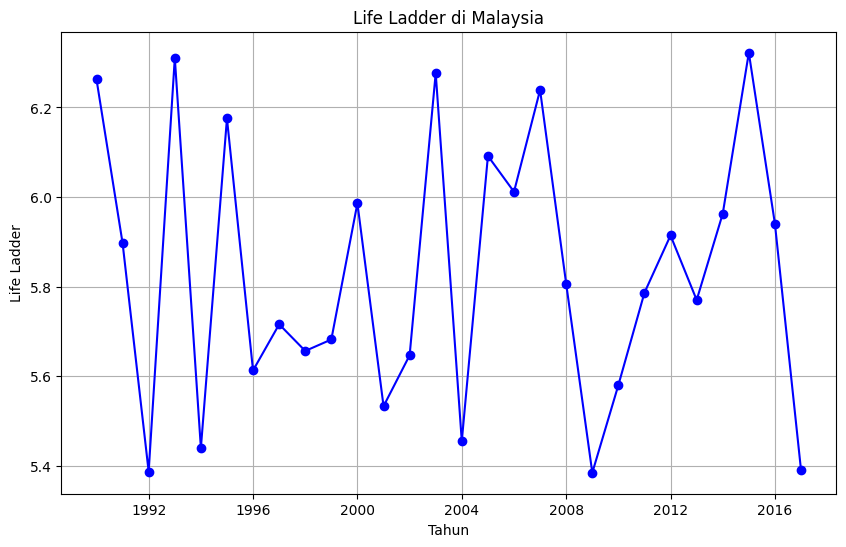

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(malay_df.index, malay_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Malaysia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

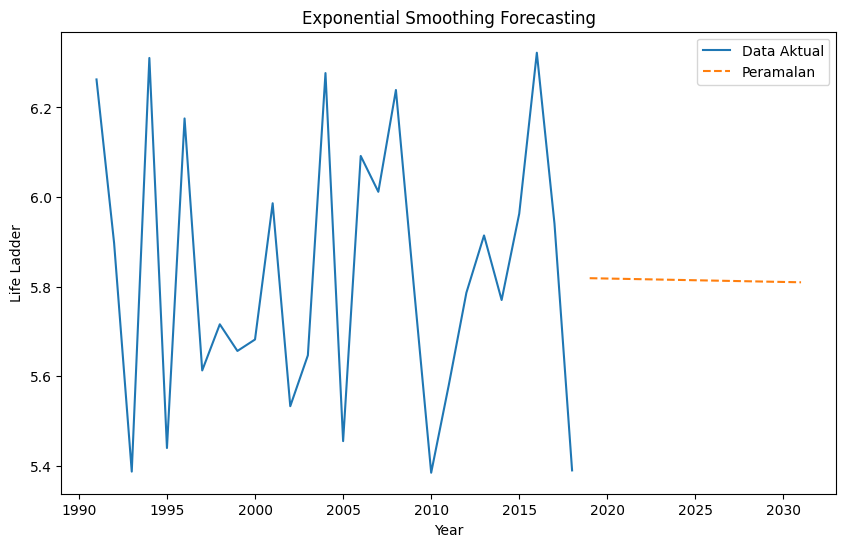

            forecast
2018-12-31  5.818880
2019-12-31  5.818116
2020-12-31  5.817353
2021-12-31  5.816590
2022-12-31  5.815826
2023-12-31  5.815063
2024-12-31  5.814299
2025-12-31  5.813536
2026-12-31  5.812772
2027-12-31  5.812009
2028-12-31  5.811245
2029-12-31  5.810482
2030-12-31  5.809718


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(malay_list), freq='Y')
life_ladder_series = pd.Series(malay_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

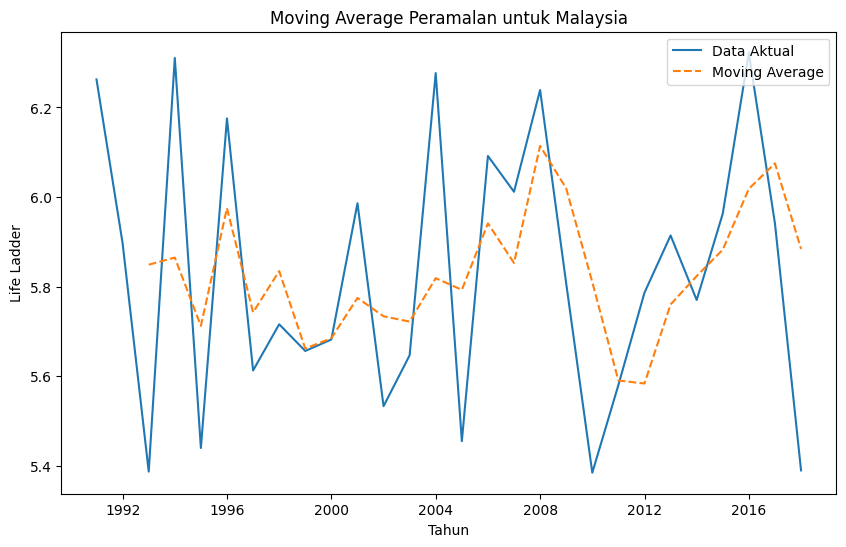

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(malay_list), freq='Y')
life_ladder_series = pd.Series(malay_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Malaysia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

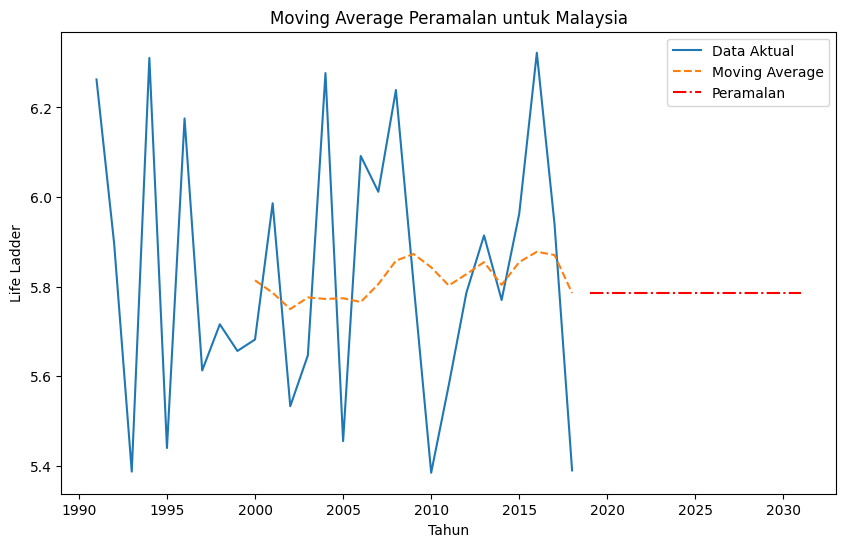

            forecast
year                
2018-12-31  5.785812
2019-12-31  5.785812
2020-12-31  5.785812
2021-12-31  5.785812
2022-12-31  5.785812
2023-12-31  5.785812
2024-12-31  5.785812
2025-12-31  5.785812
2026-12-31  5.785812
2027-12-31  5.785812
2028-12-31  5.785812
2029-12-31  5.785812
2030-12-31  5.785812


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(malay_list), freq='Y')
life_ladder_series = pd.Series(malay_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Malaysia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

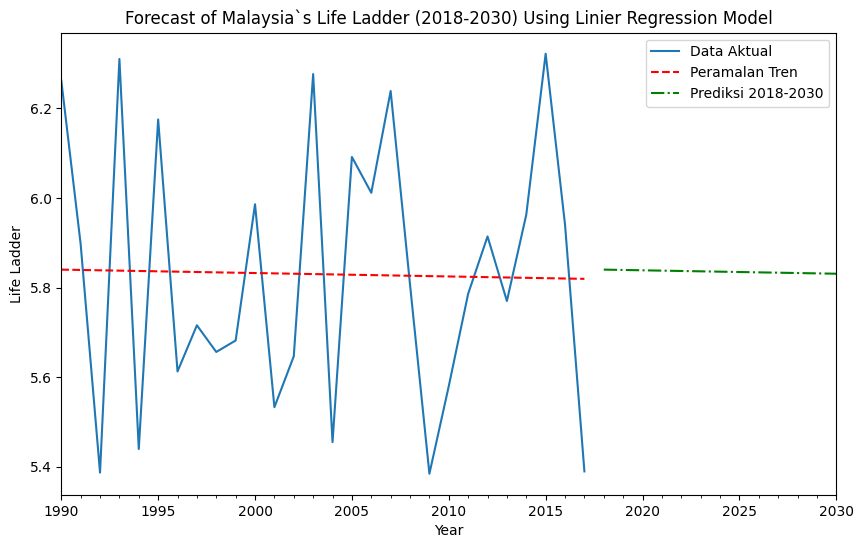

2018-12-31    5.840257
2019-12-31    5.839493
2020-12-31    5.838730
2021-12-31    5.837967
2022-12-31    5.837203
2023-12-31    5.836440
2024-12-31    5.835676
2025-12-31    5.834913
2026-12-31    5.834149
2027-12-31    5.833386
2028-12-31    5.832622
2029-12-31    5.831859
2030-12-31    5.831096
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(malay_list), freq='Y')
life_ladder_series = pd.Series(malay_list, index=years, name='Life_Ladder')

# Menambahkan tren
malay_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
malay_lm = sm.OLS(malay_df['Life_Ladder'], malay_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = malay_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Forecast of Malaysia`s Life Ladder (2018-2030) Using Linier Regression Model')
malay_lm.predict(malay_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi
print(forecast_values)

forecast_values.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\malaysia_for_lr.xlsx", index=False)

### ARIMA

Forecast for Malaysia's Life Ladder (2018-2030):
            forecast
2018-12-31  5.937015
2019-12-31  5.803985
2020-12-31  5.836330
2021-12-31  5.828466
2022-12-31  5.830378
2023-12-31  5.829913
2024-12-31  5.830026
2025-12-31  5.829998
2026-12-31  5.830005
2027-12-31  5.830003
2028-12-31  5.830004
2029-12-31  5.830004
2030-12-31  5.830004


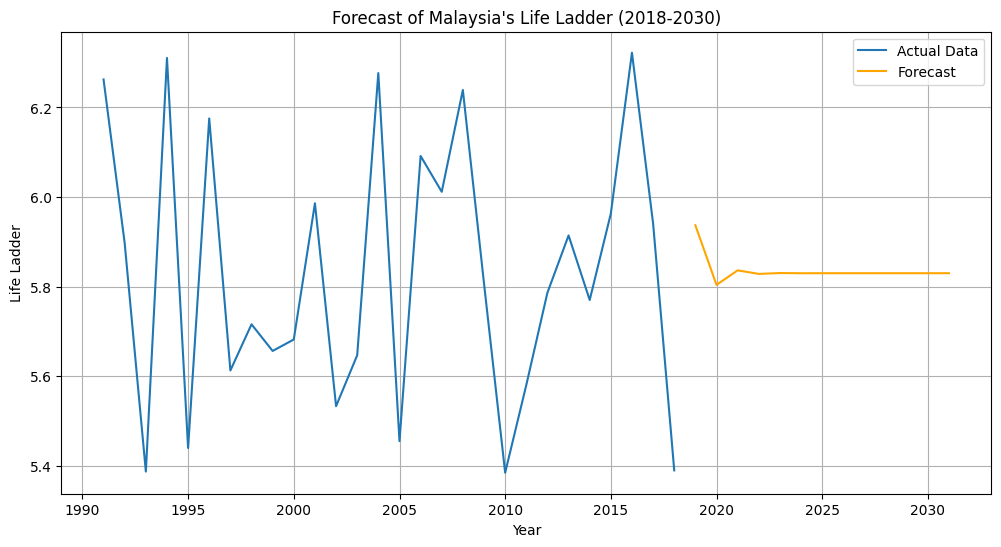

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(malay_list), freq='Y')
life_ladder_series = pd.Series(malay_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Malaysia's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Malaysia's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
malay_df_new = pd.DataFrame({'Life_Ladder': malay_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = malay_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = malay_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
malay_df['Moving Average'] = malay_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = malay_df['Life_Ladder']
ma_forecast = malay_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))

[5.81879259 5.74832908 5.82319656 5.76594496 5.85842832 5.80558068
 5.78356083 5.76154099 5.80998465]
[5.53468473 5.5081745  5.48166427 5.45515404 5.42864381 5.40213358
 5.37562335 5.34911312 5.32260289]
[5.47533624 5.55935309 5.50806115 5.53937466 5.5202579  5.5319286
 5.52480369 5.52915342 5.52649792]
1998-12-31    5.661813
1999-12-31    5.684843
2000-12-31    5.774896
2001-12-31    5.733794
2002-12-31    5.722041
2003-12-31    5.818891
2004-12-31    5.792902
2005-12-31    5.941205
2006-12-31    5.852874
2007-12-31    6.114105
2008-12-31    6.019134
2009-12-31    5.810129
2010-12-31    5.590588
2011-12-31    5.583784
2012-12-31    5.760311
2013-12-31    5.823617
2014-12-31    5.882468
2015-12-31    6.018414
2016-12-31    6.075207
2017-12-31    5.884193
Freq: A-DEC, Name: Moving Average, dtype: float64


In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.464987  7.681021  0.546573
1  Linier Regresion  0.260604  4.325667  0.311258
2    Moving Average  0.200263  3.462979  0.248067
3             ARIMA  0.369768  6.062254  0.463083


In [17]:
print(malay_list)

[6.262505873213271, 5.897249781757901, 5.387190632563068, 6.310412881345009, 5.439858504858408, 6.175430899726154, 5.612956911462444, 5.716000168423749, 5.656481618737928, 5.682048530762509, 5.986158097824268, 5.53317664479365, 5.646786849729371, 6.276709263051246, 5.455210593302425, 6.091694175432475, 6.011716842651367, 6.238904476165771, 5.806781768798828, 5.384701728820801, 5.580281734466553, 5.786367416381836, 5.914283752441406, 5.770199775695801, 5.962921619415283, 6.322121143341064, 5.940578891352687, 5.389879468875687]


In [18]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [5.384701728820801, 5.580281734466553, 5.786367416381836, 5.914283752441406, 5.770199775695801, 5.962921619415283, 6.322121143341064, 5.940578891352687, 5.389879468875687]
ses_forecast = [5.53468473, 5.5081745, 5.48166427, 5.45515404, 5.42864381, 5.40213358, 5.37562335, 5.34911312, 5.32260289]
ma_forecast = [ 5.810129, 5.590588, 5.583784, 5.760311, 5.823617, 5.882468, 6.018414, 6.075207, 5.884193]
lr_forecast = [5.81879259, 5.74832908, 5.82319656, 5.76594496, 5.85842832, 5.80558068, 5.78356083, 5.76154099, 5.80998465]
arima_forecast = [5.47533624, 5.55935309, 5.50806115, 5.53937466, 5.5202579, 5.5319286, 5.52480369, 5.52915342, 5.52649792]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,5.384702,5.534685,5.818793,5.810129,5.475336
1,2010-12-31,5.580282,5.508174,5.748329,5.590588,5.559353
2,2011-12-31,5.786367,5.481664,5.823197,5.583784,5.508061
3,2012-12-31,5.914284,5.455154,5.765945,5.760311,5.539375
4,2013-12-31,5.770200,5.428644,5.858428,5.823617,5.520258
5,2014-12-31,5.962922,5.402134,5.805581,5.882468,5.531929
6,2015-12-31,6.322121,5.375623,5.783561,6.018414,5.524804
7,2016-12-31,5.940579,5.349113,5.761541,6.075207,5.529153
8,2017-12-31,5.389879,5.322603,5.809985,5.884193,5.526498
